# Machine Learning: Counter-Strike

No arquivo cs_data.csv há dados de jogadores de CS.

- **Player Name:** nome do jogador;
- **Ping:** calculo em milésimos de segundo da velocidade de comunicação entre cliente e servidor;
- **Kills:** quantidade de abates;
- **Assists:** assistências do jogador;
- **Deaths:** mortes;
- **MVP:** quantidade de "melhor desempenho";
- **HSP:** percentagem de tiros na cabeça;
- **Score:** pontuação do jogador.

### 1. Exploração de dados

In [39]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df1 = pd.read_csv('cs_data.csv', encoding='UTF-8', sep=',')

In [41]:
df1

,Player Name,Ping,Kills,Assists,Deaths,MVP,HSP,Score
0,DNB,45,38,4,20,8,42,90
1,link1n,31,22,3,17,5,54,51
2,sn0w,42,14,4,20,0,40,42
3,reedkihaddi,90,13,3,23,0,28,33
4,pEhnol,33,11,4,27,0,54,26
...,...,...,...,...,...,...,...,...
22919,Ned Stark,23,18,3,12,5,33,47
22920,abhi17,32,20,1,9,3,45,43
22921,//MORTAL-SOUL->,10,16,1,9,3,25,41
22922,Vac_Banned_Badluck,8,17,2,13,4,17,39


### 2. Análise descritiva

**COMANDO:** Crie um modelo de Aprendizado de Máquina capaz de prever o **Score** do jogador com o menor número de colunas possível, mantendo um R² de teste maior do que 0.9. Quais foram as colunas selecionadas? Faz sentido?

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22924 entries, 0 to 22923
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player Name  22924 non-null  object
 1   Ping         22924 non-null  int64 
 2   Kills        22924 non-null  int64 
 3   Assists      22924 non-null  int64 
 4   Deaths       22924 non-null  int64 
 5   MVP          22924 non-null  int64 
 6   HSP          22924 non-null  int64 
 7   Score        22924 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.4+ MB


**EXPLICAÇÃO:** O dataset tem no total 22924 linhas de dados. Todas as colunas correspondem a esse valor, logo, não há dados faltantes.

<Axes: >

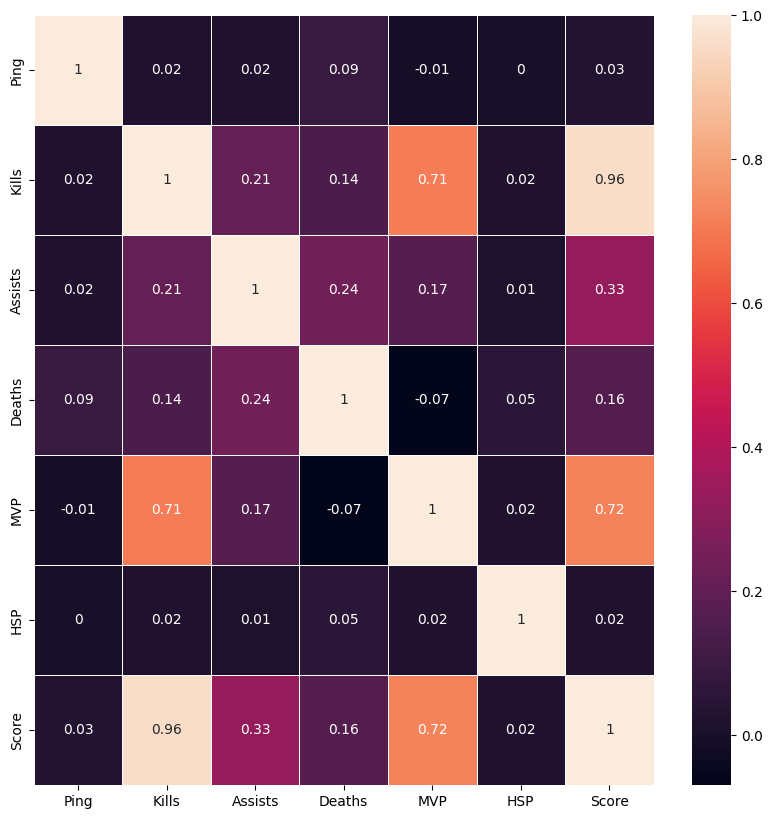

In [43]:
import seaborn as sns 
correlation_matrix = df1.drop(columns=['Player Name']).corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

**EXPLICAÇÃO:** Esse último gráfico mostra uma matriz de correlação entre as colunas. Já que, no primeiro momento, o objetivo é ver se o atributo 'kills' tem relação direta com o 'score'.

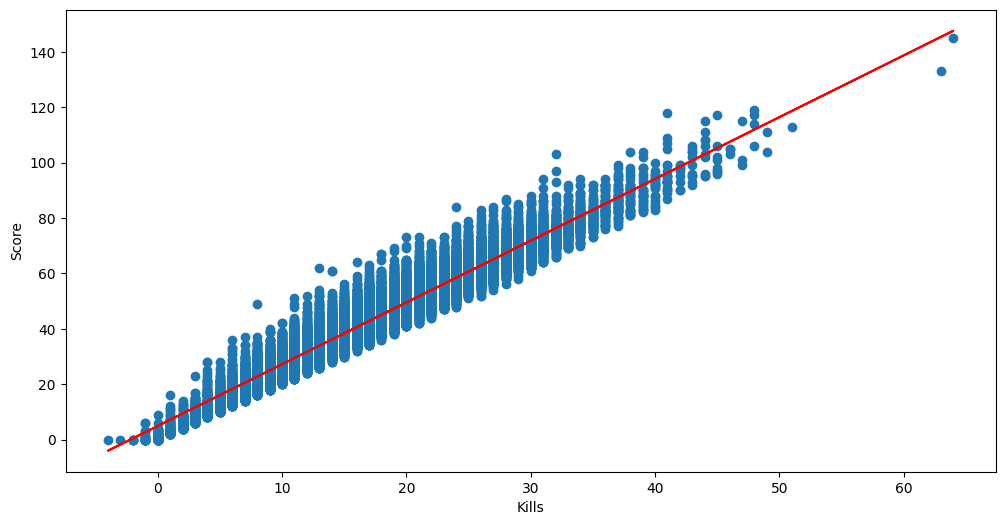

In [44]:
plt.figure(figsize=(12, 6))

# calcular os coeficientes da equação da linha de regressão linear
coef = np.polyfit(df1['Kills'], df1['Score'], 1)
m = coef[0]  # Coeficiente angular
b = coef[1]  # Coeficiente linear

#y = mx + b --- equação para visualizar a linha vermelha

plt.scatter(df1['Kills'], df1['Score'])
plt.plot(df1['Kills'], m*df1['Kills']+b, color='red')
plt.xlabel('Kills')
plt.ylabel('Score')
plt.show()

**EXPLICAÇÃO:** A partir do gráfico acima, vemos que há uma grande relação direta entre kills e score do jogador.

### 3. Tratamento dos dados

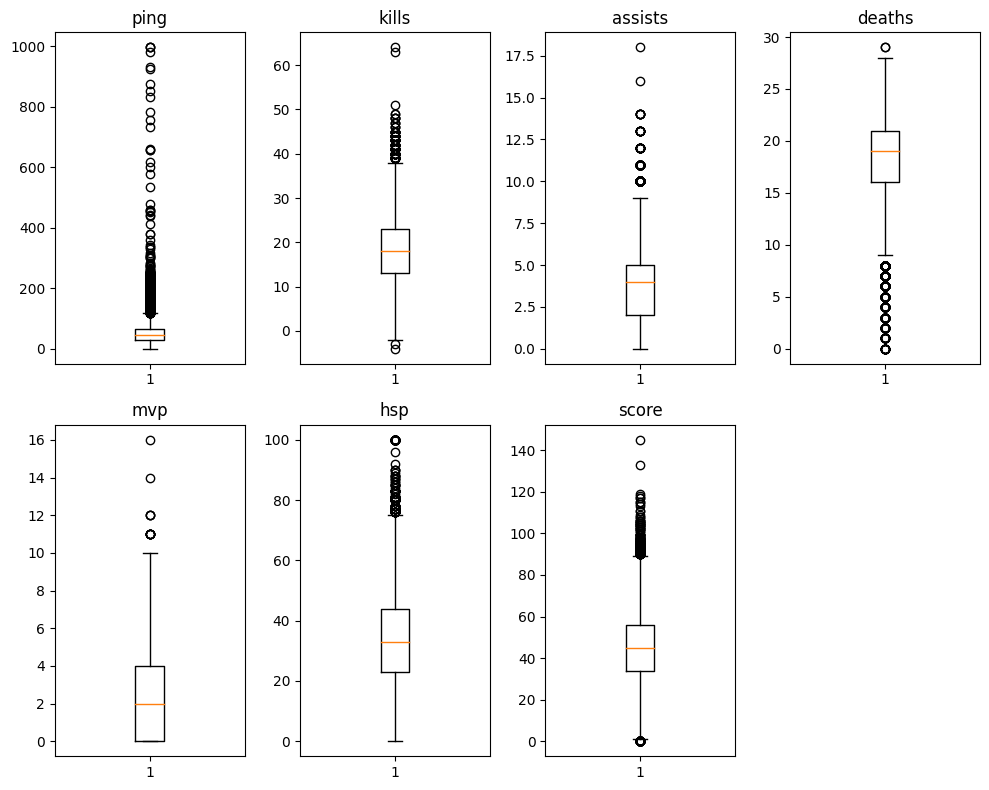

In [45]:
fig, axes = plt.subplots(2, 4, figsize=(10,8))

for i, column in enumerate(['Ping', 'Kills', 'Assists', 'Deaths', 'MVP', 'HSP', 'Score']):
    ax = axes.flatten()[i]
    ax.boxplot(df1[column])
    ax.set_title(column.lower())

# Remove o último gráfico vazio
fig.delaxes(axes[1,3])

plt.tight_layout()
plt.show()

**EXPLICAÇÃO:** Observamos que no dataset há muitos outliers, vamos tentar tratar alguns deles.

A coluna 'ping' não pode ser tratada, pois futuramente usaremos os seus maiores valores para fazer um estudo.

In [75]:
# Lista com as colunas a serem tratadas
cols = ['Kills', 'Assists', 'Deaths', 'MVP', 'HSP', 'Score']

# Loop para remover os outliers em cada coluna
for col in cols:
    # Cálculo do Z-score
    z_score = (df1[col] - df1[col].mean()) / df1[col].std()
    # Remoção dos outliers
    df2 = df1.loc[abs(z_score) <= 3]


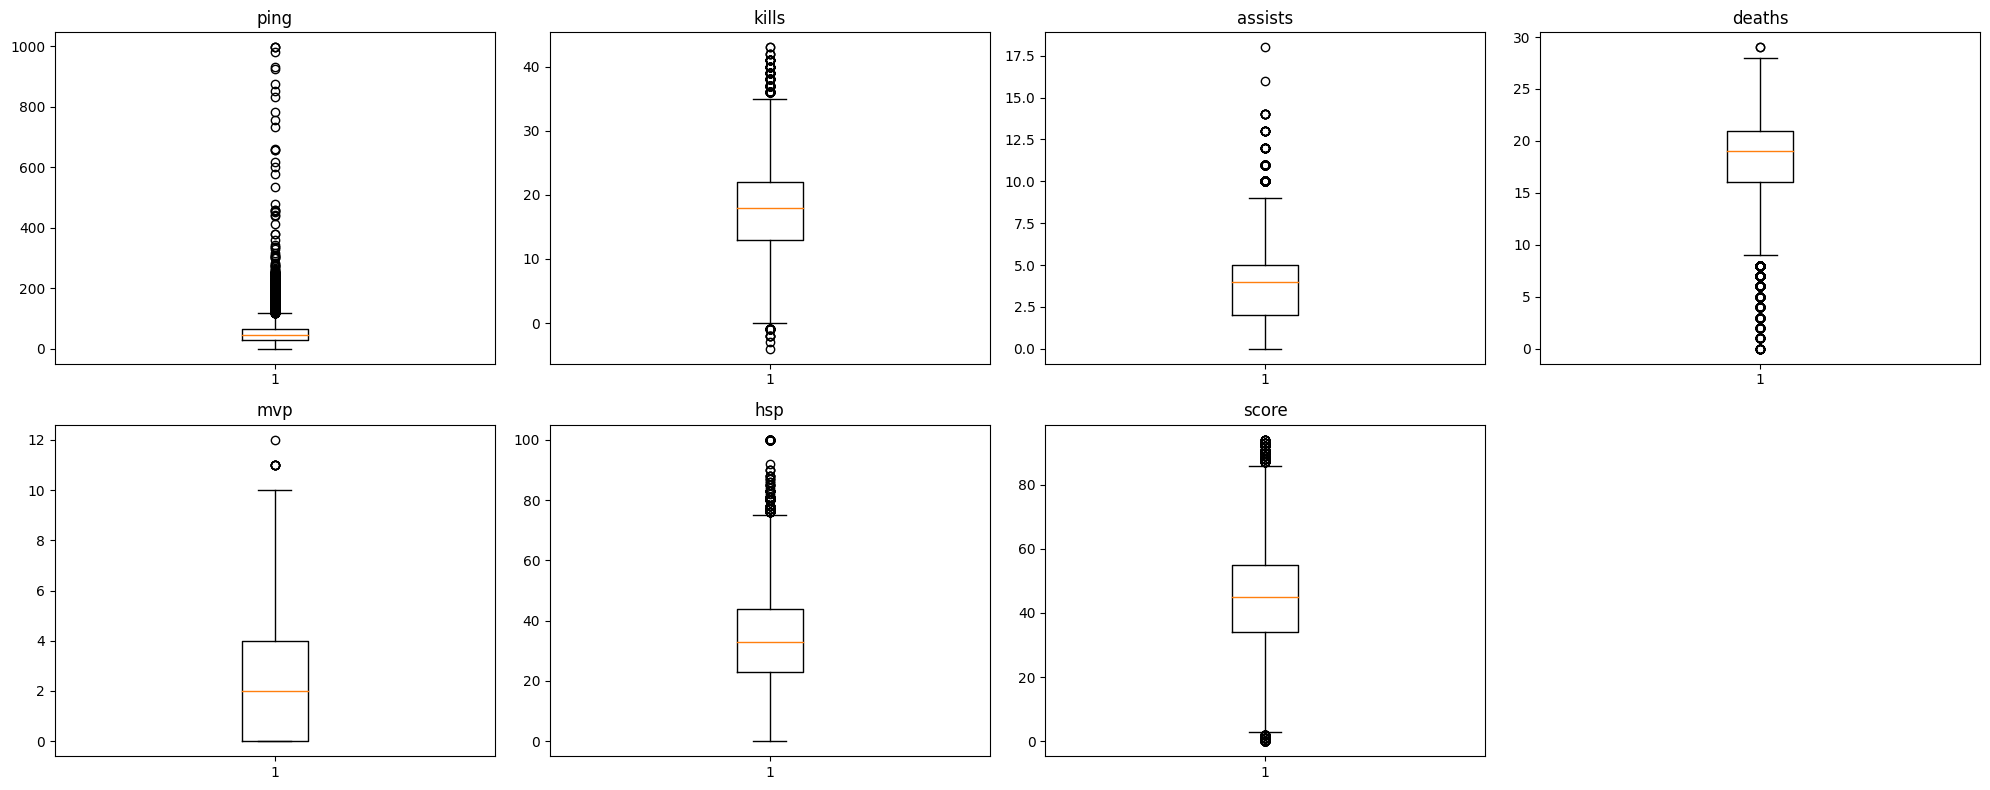

In [47]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))

for i, column in enumerate(['Ping', 'Kills', 'Assists', 'Deaths', 'MVP', 'HSP', 'Score']):
    ax = axes.flatten()[i]
    ax.boxplot(df2[column])
    ax.set_title(column.lower())

# Remove o último gráfico vazio
fig.delaxes(axes[1,3])

plt.tight_layout()
plt.show()

### 4. Treino e teste do modelo

#### a) Relação de kills e score

In [51]:
#!pip install boruta

from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

X_boruta = df2.drop(columns=['Player Name', 'Score'])
y_boruta = df2['Score']

rfr = RandomForestRegressor()
boruta = BorutaPy(rfr, n_estimators='auto', verbose=2, max_iter=50)
boruta.fit(X_boruta.values, y_boruta.values)

cols = [(nome, ranking) for nome, ranking in zip(X_boruta.columns, boruta.ranking_)]
cols = sorted(cols, key=lambda x: x[1])

# Imprima os nomes das colunas selecionadas e seus respectivos rankings
print()
print("RANKING")
print()
for nome, ranking in cols:
    print(f"{nome}: {ranking}")

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	3
Tentative: 	1
Rejected: 	2
Iteration: 	9 / 50
Confirmed: 	3
Tentative: 	1
Rejected: 	2
Iteration: 	10 / 50
Confirmed: 	3
Tentative: 	1
Rejected: 	2
Iteration: 	11 / 50
Confirmed: 	3
Tentative: 	1
Rejected: 	2
Iteration: 	12 / 50
Confirmed: 	3
Tentative: 	1
Rejected: 	2
Iteration: 	13 / 50
Confirmed: 	3
Tentative: 	1
Rejected: 	2
Iteration: 	14 / 50
Confirmed: 	3
Tentative: 	1
Rejected: 	2
Iteration: 	15 / 50
Confirmed: 	3
Tentative: 	1
Rejected: 	2
Iteration: 	16 / 50
Confirmed: 	3
Tentative: 	1
Rejected: 	2
Iteration: 	17 / 50
Confirmed: 	3

**EXPLICAÇÃO:** Usando o boruta, vemos que tem 4 colunas que tem boa relação com o 'score'.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df2[['Kills']]
y = df2['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 100)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=28,
                      random_state=RandomState(MT19937) at 0x7F2F28253840)

In [54]:
y_test_prediction = rfr.predict(X_test_scaled)
y_train_prediction = rfr.predict(X_train_scaled)

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

# calcula as métricas de treino e teste
metrics = [('R2', r2_score),
           ('MSE', mean_squared_error),
           ('MAE', mean_absolute_error), 
           ('rho', pearsonr)]

results = {}

for name, metric in metrics:
    results[name + '_test'] = metric(y_test, y_test_prediction)
    results[name + '_train'] = metric(y_train, y_train_prediction)

# imprime os resultados
print("RANDOM FOREST REGRESSOR")
print()
print("TESTE")
print('\n'.join([f"{name}: {value}" for name, value in results.items() if 'test' in name]))
print()
print("TREINO")
print('\n'.join([f"{name}: {value}" for name, value in results.items() if 'train' in name]))

RANDOM FOREST REGRESSOR

TESTE
R2_test: 0.9229861016956605
MSE_test: 21.297521415012415
MAE_test: 3.615707261851288
rho_test: PearsonRResult(statistic=0.9607744150446696, pvalue=0.0)

TREINO
R2_train: 0.924905475586866
MSE_train: 20.120112851963054
MAE_train: 3.5199269763680743
rho_train: PearsonRResult(statistic=0.9617202227613459, pvalue=0.0)


**EXPLICAÇÃO:** Olhando para a métrica R2, percebemos que o modelo tem uma boa precisão. A distância de performance entre o teste e treino são mínimos, indicando grande chance de ausência de overfitting.

#### b) Relação de ping e death

**COMANDO:** Diversos jogadores de CS dizem que morrem no jogo **apenas** por causa do **ping** (atraso devido a problemas de rede).

Usando um modelo de Aprendizado de Máquina, diga se isso é verdade ou não.

In [56]:
# calculando o coeficiente de correlação de Pearson
correlation = df2['Deaths'].corr(df2['Ping'])
print('Coeficiente de correlação:', correlation) # quanto mais próximo de 1, mais correlação vai ter

Coeficiente de correlação: 0.08848574384520892


**EXPLICAÇÃO:** A partir da correlação acima e de anteriores, nota-se que a relação é mínima, cerca de 8%.

Agrupamos os jogadores através da classe de ping deles, conforme a função abaixo.

In [57]:
def mapear_ping(x):
    if x in range(0,30): return('otimo')
    elif x in range(30,200): return('aceitavel')
    else: return('ruim')

In [58]:
df3 = df2.copy()
df3['ping_class'] = df2['Ping'].apply(mapear_ping)

In [59]:
df3.groupby('ping_class').mean()

<ipython-input-59-b7a833987819>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby('ping_class').mean()


,Ping,Kills,Assists,Deaths,MVP,HSP,Score
ping_class,,,,,,,
aceitavel,59.657847,18.171349,3.789416,18.294563,2.360196,33.762836,45.507871
otimo,14.654658,16.743265,3.594774,17.298442,2.231581,34.356865,41.969653
ruim,317.699387,15.294479,3.441718,19.294479,1.889571,36.269939,39.521472


**COMANDO:** Baseado nesse agrupamento, crie um Modelo de Aprendizado de Máquina para predizer o grupo de ping do jogador usando seus atributos descritivos. Lembre-se de não usar o coluna de Ping para isso.

Os modelos se corroboram? O que você conclui da hipótese de que o ping ruim causa mais mortes no jogo? E sobre a influência do ping no jogo como um todo, o que você pode concluir?

In [60]:
df3

,Player Name,Ping,Kills,Assists,Deaths,MVP,HSP,Score,ping_class
0,DNB,45,38,4,20,8,42,90,aceitavel
1,link1n,31,22,3,17,5,54,51,aceitavel
2,sn0w,42,14,4,20,0,40,42,aceitavel
3,reedkihaddi,90,13,3,23,0,28,33,aceitavel
4,pEhnol,33,11,4,27,0,54,26,aceitavel
...,...,...,...,...,...,...,...,...,...
22919,Ned Stark,23,18,3,12,5,33,47,otimo
22920,abhi17,32,20,1,9,3,45,43,aceitavel
22921,//MORTAL-SOUL->,10,16,1,9,3,25,41,otimo
22922,Vac_Banned_Badluck,8,17,2,13,4,17,39,otimo


In [61]:
df3[['ping_class']].groupby('ping_class').value_counts()

ping_class
aceitavel    16516
otimo         6162
ruim           163
dtype: int64

**EXPLICAÇÃO:** Percebe-se que temos grande discrepância na quantidade de dados em relação a cada tipo de classe na coluna ping_class. Devido a isso, tentaremos equilibrar essa quantidade nos próximos códigos com o oversampling.

In [65]:
df3

,Player Name,Ping,Kills,Assists,Deaths,MVP,HSP,Score,ping_class
0,DNB,45,38,4,20,8,42,90,aceitavel
1,link1n,31,22,3,17,5,54,51,aceitavel
2,sn0w,42,14,4,20,0,40,42,aceitavel
3,reedkihaddi,90,13,3,23,0,28,33,aceitavel
4,pEhnol,33,11,4,27,0,54,26,aceitavel
...,...,...,...,...,...,...,...,...,...
22919,Ned Stark,23,18,3,12,5,33,47,otimo
22920,abhi17,32,20,1,9,3,45,43,aceitavel
22921,//MORTAL-SOUL->,10,16,1,9,3,25,41,otimo
22922,Vac_Banned_Badluck,8,17,2,13,4,17,39,otimo


In [66]:
#!pip install boruta

from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

X_boruta = df3.drop(columns=['Player Name', 'Ping', 'ping_class'])
y_boruta = df3['ping_class']

rfc = RandomForestClassifier()
boruta = BorutaPy(rfc, n_estimators='auto', verbose=2, max_iter=50)
boruta.fit(X_boruta.values, y_boruta.values)

cols = [(nome, ranking) for nome, ranking in zip(X_boruta.columns, boruta.ranking_)]
cols = sorted(cols, key=lambda x: x[1])

# Imprima os nomes das colunas selecionadas e seus respectivos rankings
print()
print("RANKING")
print()
for nome, ranking in cols:
    print(f"{nome}: {ranking}")

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	6
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	0
Tentative: 	1
Rejected: 	5
Iteration: 	9 / 50
Confirmed: 	0
Tentative: 	1
Rejected: 	5
Iteration: 	10 / 50
Confirmed: 	0
Tentative: 	1
Rejected: 	5
Iteration: 	11 / 50
Confirmed: 	0
Tentative: 	1
Rejected: 	5
Iteration: 	12 / 50
Confirmed: 	0
Tentative: 	1
Rejected: 	5
Iteration: 	13 / 50
Confirmed: 	0
Tentative: 	1
Rejected: 	5
Iteration: 	14 / 50
Confirmed: 	0
Tentative: 	1
Rejected: 	5
Iteration: 	15 / 50
Confirmed: 	0
Tentative: 	1
Rejected: 	5
Iteration: 	16 / 50
Confirmed: 	0
Tentative: 	1
Rejected: 	5
Iteration: 	17 / 50
Confirmed: 	0

**EXPLICAÇÃO:** Usando o boruta, vemos que tem 2 colunas com boa relação com o 'ping_class'.

In [71]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

# separar as features e o target
X = df3[['HSP', 'Score']]
y = df3['ping_class']

# dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

# normalizar as variáveis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# aplicar o oversampling aos dados de treino
oversample = RandomOverSampler()
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test, y_test)

In [72]:
rfc.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(n_estimators=14,
                       random_state=RandomState(MT19937) at 0x7F2F28253840)

In [73]:
y_test_prediction = rfc.predict(X_test_balanced)
y_train_prediction = rfc.predict(X_train_balanced)

In [74]:
from sklearn.metrics import classification_report

# Metricas de precisão, revocação, f1-score e acurácia.
print('TESTE')
print(classification_report(y_test_balanced, y_test_prediction))
print()
print('TREINO')
print(classification_report(y_train_balanced, y_train_prediction))

TESTE
              precision    recall  f1-score   support

   aceitavel       0.33      0.57      0.42      1669
       otimo       0.43      0.42      0.42      1669
        ruim       0.47      0.14      0.21      1669

    accuracy                           0.37      5007
   macro avg       0.41      0.37      0.35      5007
weighted avg       0.41      0.37      0.35      5007


TREINO
              precision    recall  f1-score   support

   aceitavel       0.70      0.62      0.66     14847
       otimo       0.68      0.66      0.67     14847
        ruim       0.87      1.00      0.93     14847

    accuracy                           0.76     44541
   macro avg       0.75      0.76      0.75     44541
weighted avg       0.75      0.76      0.75     44541



**CONCLUSÃO:** As predições de treino estão bem distantes das de teste o que indica grande chance de overfitting pelo modelo. Ou seja, além de pouca precisão, não há ou tem pouca relação entre 'ping' e 'death' no dataset, corroborando com os estudos anteriores desse item b.

O overfitting pode ter sido influenciado pelo uso do oversampling a fim de equilibrar a quantidade de dados entre as classes. Entretanto, outros testes foram feitos sem o oversampling e, da mesma forma, o vício modelo não pôde ser evitado.